In [15]:
import pandas as pd
import numpy as np
df = pd.read_excel('Lab Session Data.xlsx' , sheet_name="Purchase data")
df.set_index('Customer', inplace=True)
df=df.iloc[0:10,0:4]
Candies= df["Candies (#)"]
Mangoes = df["Mangoes (Kg)"]
Milk_Packets = df["Milk Packets (#)"]
Payment = df["Payment (Rs)"]
A = np.column_stack((Candies, Mangoes, Milk_Packets))
C = Payment.values
pseudo_inv = np.linalg.pinv(A)
X = pseudo_inv.dot(C)
rank_A = np.linalg.matrix_rank(A)
print(A)
print("The dimensionality of the vector space is the rank of the matrix")
print("The number of vectors in this vector space are ",rank_A)
print("Rank of A:", rank_A)
print("The cost of each product are ",X,"respectively.")

[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
The dimensionality of the vector space is the rank of the matrix
The number of vectors in this vector space are  3
Rank of A: 3
The cost of each product are  [ 1. 55. 18.] respectively.


In [36]:
import pandas as pd
import numpy as np

Payment = np.array([150, 250, 300])
classification = np.array(['Poor', 'Rich', 'Rich'])

data = pd.DataFrame({
    'Payment': Payment,
    'Classification': classification
})

print("Classification of each customer:")
print(data)

print()

def classify(pay):
    d1_dist = {classification: abs(payment - pay) for payment, classification in zip(data['Payment'], data['Classification'])}
    return min(d1_dist, key=d1_dist.get)

pay = 250
print("Customer with the closest payment to", pay, ":", classify(pay))


Classification of each customer:
   Payment Classification
0      150           Poor
1      250           Rich
2      300           Rich

Customer with the closest payment to 250 : Rich


In [18]:
df2 = pd.read_excel('Lab Session Data.xlsx',sheet_name="IRCTC Stock Price")
mean=df2["Price"].mean()
var=df2["Price"].var()
print("Mean:",mean)
print("Variance:",var)
df_wed=df2[df2['Day'] =='Wed']
df_wed
df_wed['Price'].mean()
df_apr=df2[df2['Month'] =='Apr']
df_apr["Price"].mean()
loss=df2['Chg%'].apply(lambda x : x<0)
numberOfTrues=loss.sum()
totalRows=len(loss)

print(numberOfTrues/totalRows)

Mean: 1560.6634538152612
Variance: 58732.36535253918
0.4979919678714859


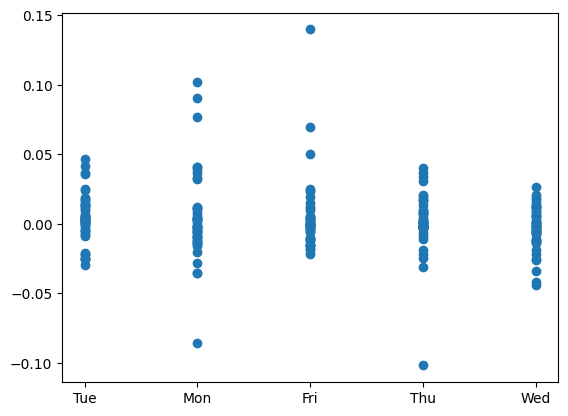

In [21]:
import matplotlib.pyplot as plt
plt.scatter(df2["Day"], df2["Chg%"])

In [29]:
thyroid_data = pd.read_excel('Lab Session Data.xlsx', sheet_name='thyroid0387_UCI', na_values='?', usecols='B:AE')

columns = thyroid_data.columns
data_types = thyroid_data.dtypes
categorical = ["Categorical" if data_type == "object" else "Numerical" for data_type in data_types]
data_range = [f"{thyroid_data[column].min()} - {thyroid_data[column].max()}" if data_type == "int64" or data_type == "float64" else "N/A" for column, data_type in zip(columns, data_types)]
missing_values = [thyroid_data[column].isnull().sum() for column in columns]
outliers = [thyroid_data[column][thyroid_data[column] > thyroid_data[column].mean() + 3 * thyroid_data[column].std()].count() if thyroid_data[column].dtype == "int64" or thyroid_data[column].dtype == "float64" else "N/A" for column in columns]
mean = [thyroid_data[column].mean() if data_type == "int64" or data_type == "float64" else "N/A" for column, data_type in zip(columns, data_types)]
variance = [thyroid_data[column].var() if data_type == "int64" or data_type == "float64" else "N/A" for column, data_type in zip(columns, data_types)]

data = pd.DataFrame({
    "Data Type": data_types,
    "Categorical/Numerical": categorical,
    "Data Range": data_range,
    "Number of Missing Values": missing_values,
    "Outliers": outliers,
    "Mean": mean,
    "Variance": variance
})

data

                          Data Type Categorical/Numerical     Data Range  \
age                           int64             Numerical      1 - 65526   
sex                          object           Categorical            N/A   
on thyroxine                 object           Categorical            N/A   
query on thyroxine           object           Categorical            N/A   
on antithyroid medication    object           Categorical            N/A   
sick                         object           Categorical            N/A   
pregnant                     object           Categorical            N/A   
thyroid surgery              object           Categorical            N/A   
I131 treatment               object           Categorical            N/A   
query hypothyroid            object           Categorical            N/A   
query hyperthyroid           object           Categorical            N/A   
lithium                      object           Categorical            N/A   
goitre      

In [24]:
for column in columns:
    if data_types[column] == "object":
        thyroid_data[column].fillna(thyroid_data[column].mode()[0], inplace=True)
    else:
        if thyroid_data[column][thyroid_data[column] > thyroid_data[column].mean() + 3 * thyroid_data[column].std()].count() == 0:
            thyroid_data[column].fillna(thyroid_data[column].mean(), inplace=True)
        else:
            thyroid_data[column].fillna(thyroid_data[column].median(), inplace=True)

thyroid_data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,29,F,f,f,f,f,f,f,f,t,...,f,104.0,f,0.96,f,109.0,f,26.0,other,NO CONDITION
1,29,F,f,f,f,f,f,f,f,f,...,t,128.0,f,0.96,f,109.0,f,26.0,other,NO CONDITION
2,41,F,f,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,11.0,other,NO CONDITION
3,36,F,f,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,26.0,other,NO CONDITION
4,32,F,f,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,36.0,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,t,64.0,t,0.83,t,77.0,f,26.0,SVI,NO CONDITION
9168,22,M,f,f,f,f,f,f,f,f,...,t,91.0,t,0.92,t,99.0,f,26.0,SVI,NO CONDITION
9169,69,M,f,f,f,f,f,f,f,f,...,t,113.0,t,1.27,t,89.0,f,26.0,SVI,I
9170,47,F,f,f,f,f,f,f,f,f,...,t,75.0,t,0.85,t,88.0,f,26.0,other,NO CONDITION


In [25]:
for column in columns:
    min_val = thyroid_data[column].min()
    max_val = thyroid_data[column].max()
    if data_types[column] == "int64" or data_types[column] == "float64":
        # thyroid_data[column] = (thyroid_data[column] - min_val) / (max_val - min_val)
        pass
    elif data_types[column] == "object":
        thyroid_data[column] = pd.Categorical(thyroid_data[column]).codes

thyroid_data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,29,0,0,0,0,0,0,0,0,1,...,0,104.0,0,0.96,0,109.0,0,26.0,5,25
1,29,0,0,0,0,0,0,0,0,0,...,1,128.0,0,0.96,0,109.0,0,26.0,5,25
2,41,0,0,0,0,0,0,0,0,0,...,0,104.0,0,0.96,0,109.0,1,11.0,5,25
3,36,0,0,0,0,0,0,0,0,0,...,0,104.0,0,0.96,0,109.0,1,26.0,5,25
4,32,0,0,0,0,0,0,0,0,0,...,0,104.0,0,0.96,0,109.0,1,36.0,5,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,1,0,0,0,0,0,0,0,0,...,1,64.0,1,0.83,1,77.0,0,26.0,3,25
9168,22,1,0,0,0,0,0,0,0,0,...,1,91.0,1,0.92,1,99.0,0,26.0,3,25
9169,69,1,0,0,0,0,0,0,0,0,...,1,113.0,1,1.27,1,89.0,0,26.0,3,15
9170,47,0,0,0,0,0,0,0,0,0,...,1,75.0,1,0.85,1,88.0,0,26.0,5,25


In [26]:
cols = [col for col in thyroid_data.columns if len(set(thyroid_data[col].values))==2]
row1 = thyroid_data.iloc[0][cols]
row2 = thyroid_data.iloc[1][cols]

def f(x, y, r1, r2):
    return len([1 for i, j in zip(r1, r2) if i == x and j == y])

JC = lambda r1, r2: f(1, 1, r1, r2) / (f(1, 1, r1, r2) + f(0, 1, r1, r2) + f(1, 0, r1, r2))
SMC = lambda r1, r2: (f(1, 1, r1, r2) + f(0, 0, r1, r2)) / (f(1, 1, r1, r2) + f(0, 1, r1, r2) + f(1, 0, r1, r2) + f(0, 0, r1, r2))

print(f"{JC(row1, row2)=} {SMC(row1, row2)=}")

JC(row1, row2)=0.25 SMC(row1, row2)=0.8571428571428571


In [27]:
# cosine similarity
full_row1 = thyroid_data.iloc[0]
full_row2 = thyroid_data.iloc[1]

cosine = np.dot(full_row1, full_row2) / (np.linalg.norm(full_row1) * np.linalg.norm(full_row2))
print("Cosine Similarity =", cosine)

Cosine Similarity = 0.994559894936184


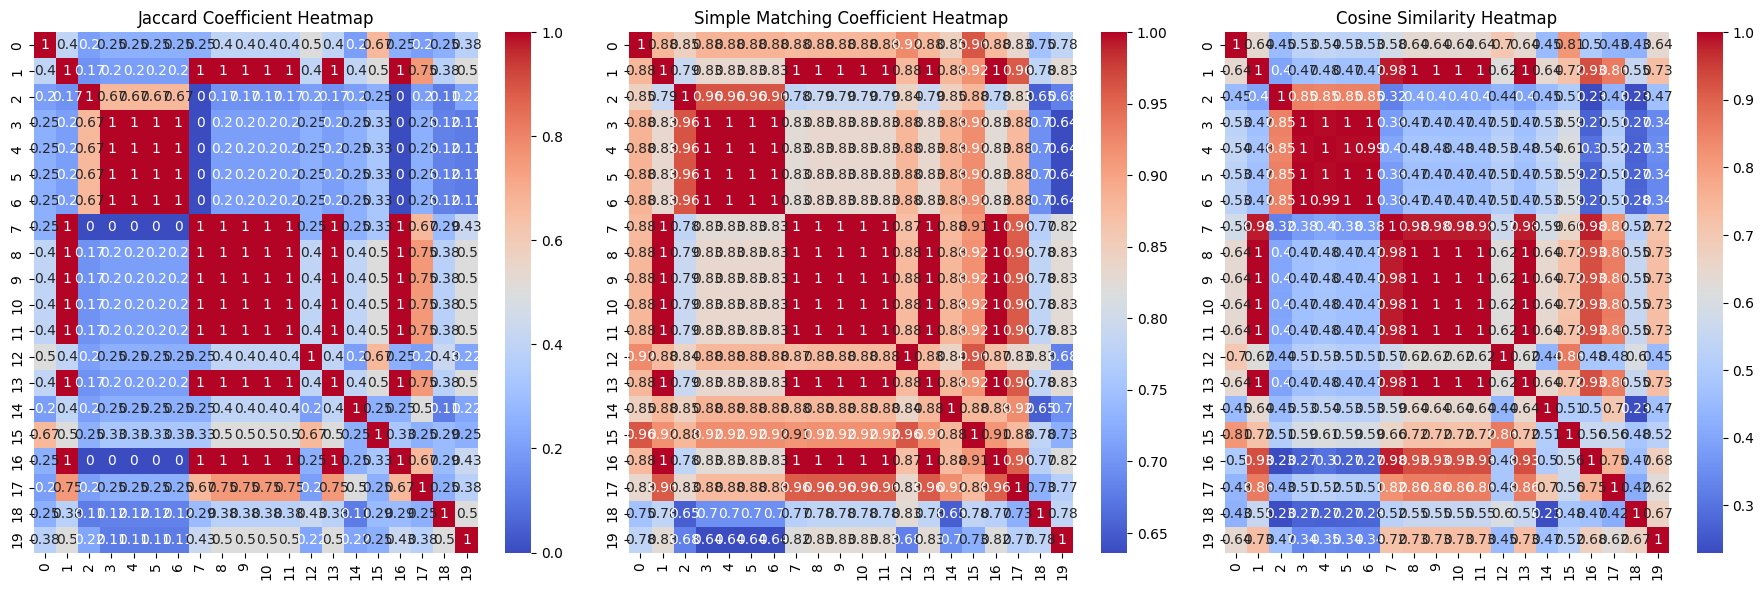

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('Lab Session Data.xlsx', sheet_name='thyroid0387_UCI', na_values='?')

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Apply Min-Max scaling
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Handle NaN values (if any)
scaled_df = scaled_df.fillna(0)

# Select first 20 observation vectors
df_20 = scaled_df.iloc[:20]

# Initialize matrices for JC, SMC, and COS
jc_matrix = np.zeros((20, 20))
smc_matrix = np.zeros((20, 20))
cosine_matrix = np.zeros((20, 20))

# Calculate JC, SMC, and COS
for i in range(20):
    for j in range(20):
        vec1 = df_20.iloc[i]
        vec2 = df_20.iloc[j]

        # Calculate f11, f10, f01, f00
        f11 = sum((vec1 == 1) & (vec2 == 1))
        f10 = sum((vec1 == 1) & (vec2 == 0))
        f01 = sum((vec1 == 0) & (vec2 == 1))
        f00 = sum((vec1 == 0) & (vec2 == 0))

        # Calculate JC and SMC
        jc_matrix[i, j] = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) > 0 else 0
        smc_matrix[i, j] = (f11 + f00) / (f11 + f10 + f01 + f00)

        # Calculate COS
        cosine_matrix[i, j] = cosine_similarity([vec1], [vec2])[0][0]

# Plot heatmaps
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(jc_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Jaccard Coefficient Heatmap')

plt.subplot(1, 3, 2)
sns.heatmap(smc_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Simple Matching Coefficient Heatmap')

plt.subplot(1, 3, 3)
sns.heatmap(cosine_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Cosine Similarity Heatmap')

plt.tight_layout()
plt.show()
